In [1]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.gridspec as gridspec

## Lorenz System

The Lorenz Equations are a system of three coupled, first-order, nonlinear differential equations which describe the trajectory of a particle through time. The system was originally derived by Lorenz as a model of atmospheric convection, but the deceptive simplicity of the equations have made them an often-used example in fields beyond atmospheric physics.

The equations describe the evolution of the spatial variables $x$, $y$, and $z$, given the governing parameters $\sigma$, $\beta$, and $\rho$, through the specification of the time-derivatives of the spatial variables:

\begin{eqnarray} 
\dot{x} &= &\sigma(y-x)\\ 
\dot{y} &= &(\rho-z)x - y\\ 
\dot{z} &= &xy-\beta z 
\end{eqnarray}

The resulting dynamics are entirely deterministic giving a starting point $(x_0, y_0, z_0)$ and a time interval $t$. Though it looks straightforward, for certain choices of the parameters $(\sigma, \rho, \beta)$, the trajectories become chaotic, and the resulting trajectories display some surprising properties. The system exhibits chaotic behaviour if all the three constants \($\sigma,\rho,\beta$) are set to specific values.

\begin{eqnarray} 
\sigma &= &10\\ 
\rho &= &28\\ 
\beta &= &\frac{8}{3} 
\end{eqnarray}

Though no general analytic solution exists for this system, the solutions can be computed numerically.  Python makes this sort of problem very easy to solve: one can simply use Scipy's interface to ODEPACK, an optimized Fortran package for solving ordinary differential equations.

The above three equations characterize how the state derivatives \($\dot{x},\dot{y},\dot{z}$) depend on \($x,y,z$) and the constants \($\sigma,\rho,\beta$)\. The function below implements this, set some initial conditions, decide on a time array to simulate over, and run the simulation using odeint().

Lorenz Attractor model is used to get simulated real-time vibration sensor data in a bearing.

In [2]:
def colorline3d(ax, x, y, z, cmap):
    N = len(x)
    skip = int(0.01*N)
    for i in range(0,N,skip):
        ax.plot(x[i:i+skip+1], y[i:i+skip+1], z[i:i+skip+1], color=cmap(int(255*i/N)))

    
# function that returns dx/dt
def f(x,t, sigma=10.0, beta=8.0/3.0, rho=28.0): # x is 3 x 1
        
    f1 = sigma*(x[1]-x[0])
    f2 = x[0]*(rho-x[2])-x[1]
    f3 = x[0]*x[1]-beta*x[2]
    f = np.array([f1,f2,f3])
    return f

def simulate(t_star, x0, noise, param_s=10.0, param_b=8.0/3.0, param_r=28.0):
    # solve ODE
    X_star = odeint(f, x0, t_star, args=(param_s, param_b, param_r))

    skip = 1
    dt = t_star[skip] - t_star[0]
    _data_sim = X_star[0::skip,:]
    _data_sim = _data_sim + noise*_data_sim.std(0)*np.random.randn(_data_sim.shape[0], _data_sim.shape[1])
    _data_sim = np.reshape(_data_sim, (_data_sim.shape[0],_data_sim.shape[1]))
    return _data_sim

# time points
time_points = np.arange(0,25,0.01)
    
# initial condition
x0 = np.array([-8.0, 7.0, 27])

_data_train = simulate(time_points, x0, 0)
_data_noise = simulate(time_points, x0, 0.3)
_data_test_one = simulate(time_points, x0, 0, 28.5, 2.2, 45)

## Visually inspect the data

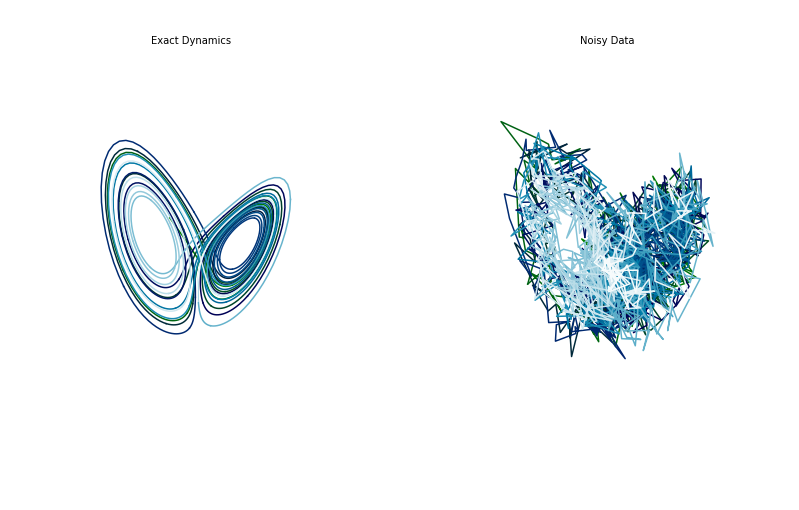

In [80]:
####### Plotting ################## 
def plotComparison(dataset1, title1, dataset2, title2):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    ax.axis('off')

    gs0 = gridspec.GridSpec(1, 2)
    gs0.update(top=0.95, bottom=0.1, left=0.0, right=0.90, wspace=0.15)

    ax = plt.subplot(gs0[:, 0:1], projection='3d')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    colorline3d(ax, dataset1[:,0], dataset1[:,1], dataset1[:,2], cmap = plt.cm.ocean)
    ax.grid(False)
    ax.set_xlim([-20,20])
    ax.set_ylim([-50,50])
    ax.set_zlim([0,50])
    ax.set_xticks([-20,0,20])
    ax.set_yticks([-40,0,40])
    ax.set_zticks([0,25,50])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title(title1, fontsize = 10)
    ax.axis('off')
    ax = plt.subplot(gs0[:, 1:2], projection='3d')
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))    
    colorline3d(ax, dataset2[:,0], dataset2[:,1], dataset2[:,2], cmap = plt.cm.ocean)
    ax.grid(False)
    ax.set_xlim([-20,20])
    ax.set_ylim([-50,50])
    ax.set_zlim([0,50])
    ax.set_xticks([-20,0,20])
    ax.set_yticks([-40,0,40])
    ax.set_zticks([0,25,50])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_title(title2, fontsize = 10)
    ax.axis('off')
plotComparison(_data_train, 'Exact Dynamics', _data_noise, 'Noisy Data')

In [5]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, SimpleRNN
from keras.utils.vis_utils import plot_model
import pickle

/Users/ldalmeida/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
import tensorflow as tf
import tflearn
import tensorflow.contrib.layers as tflayers
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn
from complex_valued_models.ComplexRNN import ComplexRNNCell
from complex_valued_models.URNN import URNNCell

While this system oscillates between two semi-stable states, it is hard to identify any regular patterns

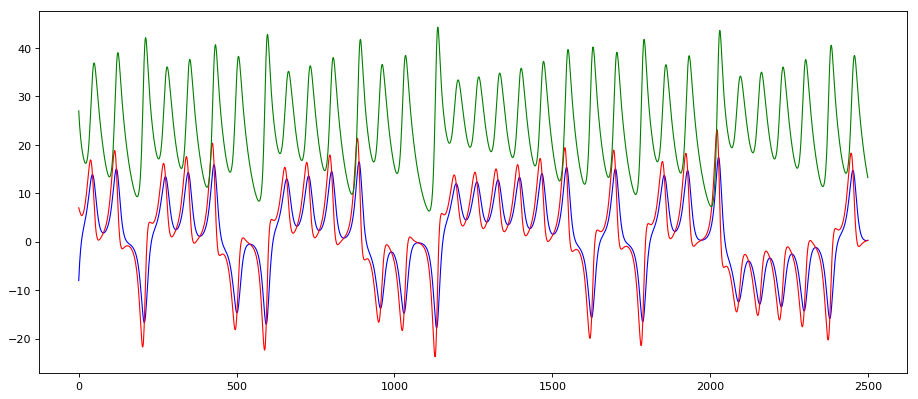

In [8]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(_data_train)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), _data_train[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), _data_train[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), _data_train[:,2], '-', color='green', animated = True, linewidth=1)

### Compare frequencies of healthy and noisy data

In [9]:
data_train_fft = np.fft.fft(_data_train)
data_noise_fft = np.fft.fft(_data_noise)

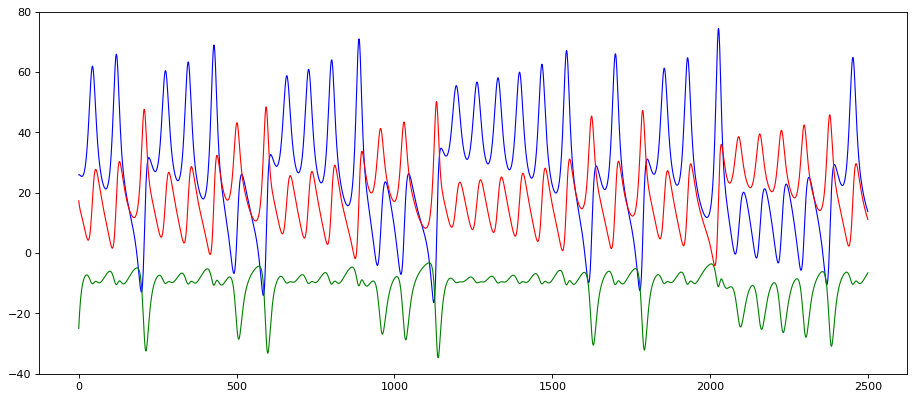

In [10]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_train_fft)
ax.plot(range(0,size), data_train_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_train_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_train_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

Note: I am plotting the imaginary part of the red dimension to see three lines because two dimensions on this dataset are completely overlapping in frequency and the real part is zero.

It is evident that there are lot of frequencies present in noisy signal.

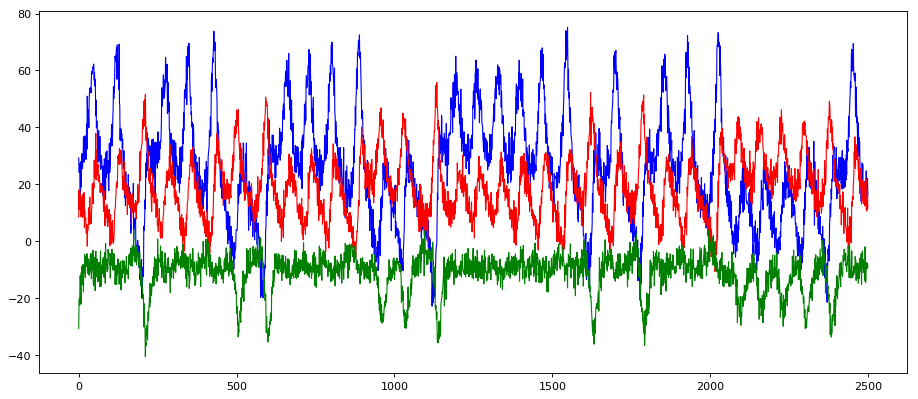

In [11]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_noise_fft)
ax.plot(range(0,size), data_noise_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_noise_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_noise_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

## Real valued neural networks

Based on research (the 2012 Stanford publication titled Deep Learning for Time Series Modeling by Enzo Busseti, Ian Osband, and Scott Wong), I will skip experimenting with deep feed-forward neural networks and directly start experimenting with a deep, recurrent neural network because it uses LSTM layers. Using LSTM layers is a way to introduce memory to neural networks that makes them ideal for analyzing time-series and sequence data.
### Data pre-processing for Keras neural networks

In [70]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(_data_train)
X_noise_scaled = scaler.transform(_data_noise)

LSTMs want their input to contain windows of times. This way instead of 2500 samples per dimension we have batches of length 20. Here, the objective is given the last 20 time steps of the signal predict 5 steps ahead.

In [71]:
def getData(x):
    seq = []
    next_val = []
    for i in range(0, len(x) - steps_of_history - steps_in_future, steps_in_future):
        seq.append(x[i: i + steps_of_history])
        next_val.append(x[i + steps_of_history + steps_in_future -1])
    seq = np.reshape(seq, [-1, steps_of_history, 3])
    next_val = np.reshape(next_val, [-1, 3])
    X = np.array(seq)
    Y = np.array(next_val)
    return X,Y

step_radians = 0.01
steps_of_history = 20
steps_in_future = 5
x_train,y_train = getData(X_train_scaled)
x_noise,y_noise = getData(X_noise_scaled)
timesteps = steps_of_history
dim = 3

In [72]:
losses = []
 
def handleLoss(loss):
        global losses
        losses+=[loss]
        print(loss)
 
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

### Simple Recurrent Neural Network

In [19]:
# Build neural network
def _simple_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50,input_shape=(timesteps,dim)))
    model.add(Dense(3))
    # Compile model
    model.compile(optimizer='adam',
                  loss='mean_squared_error')
    return model

In [20]:
mod_2 = _simple_rnn_model()
plot_model(mod_2, to_file='plots/model_plot.png', show_shapes=True, show_layer_names=True)
print(mod_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2700      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 153       
Total params: 2,853
Trainable params: 2,853
Non-trainable params: 0
_________________________________________________________________
None


In [78]:
mod_2.fit(x_train, y_train,
        validation_data = (x_train, y_train),
        epochs = 50, batch_size = 72, callbacks = [LossHistory()], shuffle = False)

Train on 495 samples, validate on 495 samples
Epoch 1/50
 72/495 [===>..........................] - ETA: 0s - loss: 8.2197e-068.219747e-06
1.1682857e-05
1.3288805e-05
2.254737e-05
9.110625e-06
2.9622652e-05
7.682223e-06
495/495 [==============================] - 0s 108us/step - loss: 1.4719e-05 - val_loss: 1.3438e-05
Epoch 2/50
 72/495 [===>..........................] - ETA: 0s - loss: 8.0733e-068.073261e-06
1.1511402e-05
1.3100334e-05
2.2078195e-05
9.024592e-06
2.921761e-05
7.5581274e-06
495/495 [==============================] - 0s 102us/step - loss: 1.4490e-05 - val_loss: 1.3229e-05
Epoch 3/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.9288e-067.928753e-06
1.1344785e-05
1.2913272e-05
2.1619375e-05
8.941686e-06
2.8821329e-05
7.4344002e-06
495/495 [==============================] - 0s 107us/step - loss: 1.4265e-05 - val_loss: 1.3024e-05
Epoch 4/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.7861e-067.786071e-06
1.1182445e-05
1.2726974e-05
2.1171398e-

Epoch 31/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.3208e-065.3207777e-06
7.752657e-06
8.214371e-06
1.3030502e-05
7.049794e-06
1.9915278e-05
5.048996e-06
495/495 [==============================] - 0s 141us/step - loss: 9.5565e-06 - val_loss: 9.1977e-06
Epoch 32/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.2695e-065.2694886e-06
7.652941e-06
8.115721e-06
1.2869991e-05
6.9598077e-06
1.9675419e-05
5.022336e-06
495/495 [==============================] - 0s 141us/step - loss: 9.4455e-06 - val_loss: 9.1045e-06
Epoch 33/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.2173e-065.2172895e-06
7.5566545e-06
8.023138e-06
1.2715824e-05
6.8693334e-06
1.9442516e-05
4.9966798e-06
495/495 [==============================] - 0s 118us/step - loss: 9.3377e-06 - val_loss: 9.0113e-06
Epoch 34/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.1644e-065.1643824e-06
7.463803e-06
7.935801e-06
1.2568435e-05
6.7786987e-06
1.9217026e-05
4.9718e-06


The test and train phase of neural network is done twenty times with actual data and one time with noisy data. A spike is observed whenever the actual data pre-trained neural network sees noisy data. 

In [79]:
for i in range(20):
     
    print("----------------actual samples")
    mod_2.fit(x_train, y_train,
        validation_data = (x_train, y_train),
        epochs = 50, batch_size = 72, callbacks = [LossHistory()], shuffle = False)
    yhat_healthy = mod_2.predict(x_train)
    yhat_broken = mod_2.predict(x_noise)

print("----------------noise")
mod_2.fit(x_noise,y_noise,
        validation_data = (x_noise,y_noise),
        epochs = 50, batch_size = 72, callbacks = [LossHistory()], shuffle = False)
yhat_healthy = mod_2.predict(x_train)
yhat_broken = mod_2.predict(x_noise)

----------------actual samples
Train on 495 samples, validate on 495 samples
Epoch 1/50
 72/495 [===>..........................] - ETA: 0s - loss: 4.3007e-064.300722e-06
6.276907e-06
6.766903e-06
1.0683525e-05
5.5307096e-06
1.621416e-05
4.4468898e-06
495/495 [==============================] - 0s 131us/step - loss: 7.8057e-06 - val_loss: 7.5178e-06
Epoch 2/50
 72/495 [===>..........................] - ETA: 0s - loss: 4.2605e-064.2604825e-06
6.220002e-06
6.7051487e-06
1.0593457e-05
5.478814e-06
1.607168e-05
4.4134667e-06
495/495 [==============================] - 0s 112us/step - loss: 7.7369e-06 - val_loss: 7.4513e-06
Epoch 3/50
 72/495 [===>..........................] - ETA: 0s - loss: 4.2214e-064.221402e-06
6.1637343e-06
6.644372e-06
1.0504481e-05
5.428191e-06
1.5932621e-05
4.3805985e-06
495/495 [==============================] - 0s 108us/step - loss: 7.6695e-06 - val_loss: 7.3864e-06
Epoch 4/50
 72/495 [===>..........................] - ETA: 0s - loss: 4.1834e-064.1833528e-06
6.108229

3.676357e-06
495/495 [==============================] - 0s 118us/step - loss: 6.2076e-06 - val_loss: 6.0297e-06
Epoch 31/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.4448e-063.4447553e-06
4.8507254e-06
5.2776527e-06
8.365188e-06
4.4078665e-06
1.28300435e-05
3.6559277e-06
495/495 [==============================] - 0s 114us/step - loss: 6.1637e-06 - val_loss: 5.9885e-06
Epoch 32/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.4228e-063.4227908e-06
4.8124016e-06
5.2397654e-06
8.300506e-06
4.379277e-06
1.27414905e-05
3.6359443e-06
495/495 [==============================] - 0s 115us/step - loss: 6.1204e-06 - val_loss: 5.9476e-06
Epoch 33/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.4008e-063.4008096e-06
4.774862e-06
5.202224e-06
8.236508e-06
4.351253e-06
1.265408e-05
3.6160573e-06
495/495 [==============================] - 0s 113us/step - loss: 6.0776e-06 - val_loss: 5.9073e-06
Epoch 34/50
 72/495 [===>..........................] - ETA: 

 72/495 [===>..........................] - ETA: 0s - loss: 2.8600e-062.859968e-06
3.9380875e-06
4.33872e-06
6.7788746e-06
3.7031646e-06
1.0696221e-05
3.1572558e-06
495/495 [==============================] - 0s 120us/step - loss: 5.1022e-06 - val_loss: 4.9456e-06
Epoch 11/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.8425e-062.842538e-06
3.912237e-06
4.3111268e-06
6.7338888e-06
3.6814542e-06
1.0636682e-05
3.144163e-06
495/495 [==============================] - 0s 119us/step - loss: 5.0719e-06 - val_loss: 4.9144e-06
Epoch 12/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.8247e-062.8247262e-06
3.887093e-06
4.2828297e-06
6.68953e-06
3.6606975e-06
1.0577244e-05
3.1305763e-06
495/495 [==============================] - 0s 116us/step - loss: 5.0417e-06 - val_loss: 4.8842e-06
Epoch 13/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.8079e-062.8079114e-06
3.862076e-06
4.2558245e-06
6.646074e-06
3.6393021e-06
1.05190875e-05
3.1178986e-06
495/495 [

Epoch 40/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.4256e-062.4255714e-06
3.289893e-06
3.5989765e-06
5.659062e-06
3.0947238e-06
9.207774e-06
2.9283333e-06
495/495 [==============================] - 0s 111us/step - loss: 4.3401e-06 - val_loss: 4.1580e-06
Epoch 41/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.4146e-062.4145997e-06
3.2720966e-06
3.577762e-06
5.6291383e-06
3.074696e-06
9.168106e-06
2.9298396e-06
495/495 [==============================] - 0s 111us/step - loss: 4.3200e-06 - val_loss: 4.1369e-06
Epoch 42/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.4040e-062.4040464e-06
3.2546393e-06
3.5569776e-06
5.599847e-06
3.0545716e-06
9.1290685e-06
2.9328196e-06
495/495 [==============================] - 0s 114us/step - loss: 4.3004e-06 - val_loss: 4.1162e-06
Epoch 43/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.3940e-062.3939622e-06
3.2373052e-06
3.5364303e-06
5.5713144e-06
3.034597e-06
9.090846e-06
2.9365362e

495/495 [==============================] - 0s 114us/step - loss: 4.0903e-06 - val_loss: 3.7879e-06
Epoch 20/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.3389e-062.3389232e-06
2.90884e-06
3.2944e-06
5.183912e-06
2.4564943e-06
8.423219e-06
4.204033e-06
495/495 [==============================] - 0s 114us/step - loss: 4.1141e-06 - val_loss: 3.7924e-06
Epoch 21/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.3544e-062.3544426e-06
2.9113135e-06
3.3255697e-06
5.2070154e-06
2.4367716e-06
8.42788e-06
4.3741243e-06
495/495 [==============================] - 0s 113us/step - loss: 4.1441e-06 - val_loss: 3.7999e-06
Epoch 22/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.3731e-062.37314e-06
2.9177693e-06
3.3665729e-06
5.2377686e-06
2.41819e-06
8.438148e-06
4.5695065e-06
495/495 [==============================] - 0s 115us/step - loss: 4.1818e-06 - val_loss: 3.8100e-06
Epoch 23/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.3947e-062

4.8282018e-05
2.270285e-05
4.5223576e-05
0.00011043766
495/495 [==============================] - 0s 115us/step - loss: 4.7517e-05 - val_loss: 1.4815e-05
Epoch 50/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.5070e-051.50700325e-05
3.5222834e-05
7.3244126e-05
5.3645846e-05
2.4783818e-05
4.7110996e-05
0.000120922996
495/495 [==============================] - 0s 110us/step - loss: 5.1620e-05 - val_loss: 1.6732e-05
----------------actual samples
Train on 495 samples, validate on 495 samples
Epoch 1/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.7766e-051.7766153e-05
3.3805372e-05
7.680467e-05
5.7190508e-05
2.5898937e-05
4.675331e-05
0.00012636396
495/495 [==============================] - 0s 134us/step - loss: 5.3642e-05 - val_loss: 1.8696e-05
Epoch 2/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.0570e-052.0570347e-05
2.9756242e-05
7.560203e-05
5.7276324e-05
2.5702982e-05
4.353364e-05
0.00012360465
495/495 [=============================

495/495 [==============================] - 0s 111us/step - loss: 2.4901e-05 - val_loss: 8.0823e-06
Epoch 29/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.8620e-067.862015e-06
1.574427e-05
3.051424e-05
3.059862e-05
1.5093754e-05
2.270769e-05
5.9823873e-05
495/495 [==============================] - 0s 120us/step - loss: 2.5435e-05 - val_loss: 8.9419e-06
Epoch 30/50
 72/495 [===>..........................] - ETA: 0s - loss: 9.0068e-069.00679e-06
1.4310472e-05
3.0201656e-05
2.9281111e-05
1.4878558e-05
2.116464e-05
5.8100657e-05
495/495 [==============================] - 0s 118us/step - loss: 2.4681e-05 - val_loss: 9.6374e-06
Epoch 31/50
 72/495 [===>..........................] - ETA: 0s - loss: 9.9216e-069.921604e-06
1.2344726e-05
2.828816e-05
2.6514013e-05
1.3902387e-05
1.9143656e-05
5.3187105e-05
495/495 [==============================] - 0s 115us/step - loss: 2.2786e-05 - val_loss: 1.0027e-05
Epoch 32/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.0453

 72/495 [===>..........................] - ETA: 0s - loss: 3.7073e-063.7072512e-06
3.2473563e-05
2.6755435e-05
3.2619635e-05
2.6168163e-05
3.7437545e-05
6.610366e-05
495/495 [==============================] - 0s 110us/step - loss: 3.1564e-05 - val_loss: 7.9999e-06
Epoch 9/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.1485e-065.1484903e-06
5.0783336e-05
4.861939e-05
5.453722e-05
4.3795135e-05
5.5732155e-05
0.00011561319
495/495 [==============================] - 0s 109us/step - loss: 5.2331e-05 - val_loss: 1.1374e-05
Epoch 10/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.9855e-067.985464e-06
7.625353e-05
8.3305145e-05
8.9244386e-05
6.93228e-05
8.2057966e-05
0.00019123332
495/495 [==============================] - 0s 112us/step - loss: 8.3709e-05 - val_loss: 1.6089e-05
Epoch 11/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.2983e-051.29832915e-05
0.00010557642
0.00013275773
0.00014014568
0.000100330435
0.00011416874
0.00029385844
495/4

Epoch 38/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.5397e-061.5397335e-06
1.7318303e-06
2.004617e-06
3.0400904e-06
1.8630799e-06
4.925476e-06
2.0775242e-06
495/495 [==============================] - 0s 113us/step - loss: 2.4615e-06 - val_loss: 2.2767e-06
Epoch 39/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.5198e-061.5198152e-06
1.7470114e-06
1.9829686e-06
3.0105414e-06
1.8469204e-06
4.9044465e-06
2.0805098e-06
495/495 [==============================] - 0s 115us/step - loss: 2.4483e-06 - val_loss: 2.2470e-06
Epoch 40/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.4939e-061.4938829e-06
1.7493832e-06
1.9599536e-06
2.9882851e-06
1.8363631e-06
4.8641896e-06
2.0687608e-06
495/495 [==============================] - 0s 120us/step - loss: 2.4294e-06 - val_loss: 2.2324e-06
Epoch 41/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.4851e-061.4851398e-06
1.7261696e-06
1.9512072e-06
2.980747e-06
1.82954e-06
4.8130096e-06
2.0714

4.8691636e-05
4.2297557e-05
0.00014186716
495/495 [==============================] - 0s 111us/step - loss: 5.6853e-05 - val_loss: 1.1233e-05
Epoch 18/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.1596e-051.1595873e-05
5.032131e-05
7.464617e-05
8.3136285e-05
5.771393e-05
5.1698473e-05
0.00017182538
495/495 [==============================] - 0s 110us/step - loss: 6.9740e-05 - val_loss: 1.3748e-05
Epoch 19/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.4950e-051.4949561e-05
5.301228e-05
8.632286e-05
9.5928284e-05
6.145089e-05
5.656382e-05
0.00018766041
495/495 [==============================] - 0s 112us/step - loss: 7.7444e-05 - val_loss: 1.6972e-05
Epoch 20/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.9025e-051.9024757e-05
4.6936235e-05
8.6714776e-05
9.5871175e-05
5.6922894e-05
5.3193395e-05
0.00017546926
495/495 [==============================] - 0s 129us/step - loss: 7.4502e-05 - val_loss: 2.0582e-05
Epoch 21/50
 72/495 [===>.......

 72/495 [===>..........................] - ETA: 0s - loss: 2.5498e-062.549827e-06
4.5025818e-06
6.1184764e-06
9.611581e-06
7.190428e-06
7.0784145e-06
9.250897e-06
495/495 [==============================] - 0s 110us/step - loss: 6.5667e-06 - val_loss: 2.9937e-06
Epoch 48/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.9101e-062.910136e-06
3.157972e-06
5.036394e-06
6.838285e-06
6.0969946e-06
5.541294e-06
6.29057e-06
495/495 [==============================] - 0s 112us/step - loss: 5.1033e-06 - val_loss: 2.8964e-06
Epoch 49/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.7397e-062.7396995e-06
2.0097848e-06
3.1056281e-06
4.2708652e-06
4.3907207e-06
4.6198056e-06
3.0273802e-06
495/495 [==============================] - 0s 126us/step - loss: 3.4597e-06 - val_loss: 2.4602e-06
Epoch 50/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.0089e-062.0089271e-06
1.5719075e-06
1.7064026e-06
2.765118e-06
2.5196905e-06
4.324028e-06
1.1418222e-06
495/495 [===

8.464996e-06
495/495 [==============================] - 0s 121us/step - loss: 5.4234e-06 - val_loss: 2.6063e-06
Epoch 27/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.9560e-061.9560175e-06
2.0723419e-06
3.812557e-06
5.8453525e-06
3.094879e-06
5.4300563e-06
6.4212086e-06
495/495 [==============================] - 0s 110us/step - loss: 4.0480e-06 - val_loss: 2.9800e-06
Epoch 28/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.5315e-062.5315137e-06
1.6257366e-06
2.8984036e-06
4.6606024e-06
3.163535e-06
5.1933393e-06
4.502795e-06
495/495 [==============================] - 0s 110us/step - loss: 3.4928e-06 - val_loss: 2.5575e-06
Epoch 29/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.0005e-062.000532e-06
1.8894467e-06
1.8243486e-06
3.302951e-06
2.167065e-06
4.9099813e-06
2.4324415e-06
495/495 [==============================] - 0s 129us/step - loss: 2.6506e-06 - val_loss: 2.0779e-06
Epoch 30/50
 72/495 [===>..........................] - ETA: 0

 72/495 [===>..........................] - ETA: 0s - loss: 2.2751e-052.2751448e-05
1.0121275e-05
7.806429e-06
7.0464107e-06
2.0706946e-05
2.0631933e-05
4.5062675e-06
495/495 [==============================] - 0s 111us/step - loss: 1.3528e-05 - val_loss: 1.6960e-05
Epoch 7/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.6940e-051.6940116e-05
2.3132372e-05
5.1838333e-06
2.0041858e-05
2.9968227e-05
3.960493e-05
1.7981696e-05
495/495 [==============================] - 0s 108us/step - loss: 2.1906e-05 - val_loss: 1.1845e-05
Epoch 8/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.1603e-051.1602608e-05
4.708516e-05
2.2347593e-05
6.2798135e-05
4.636348e-05
6.488993e-05
6.234319e-05
495/495 [==============================] - 0s 108us/step - loss: 4.5038e-05 - val_loss: 8.5809e-06
Epoch 9/50
 72/495 [===>..........................] - ETA: 0s - loss: 8.1436e-068.1435965e-06
6.4007225e-05
4.387289e-05
0.00010239271
5.593821e-05
7.390453e-05
9.926046e-05
495/495 [===

Epoch 36/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.4136e-062.4135884e-06
4.8567945e-06
4.489658e-06
9.152259e-06
8.917854e-06
7.0730175e-06
1.613474e-05
495/495 [==============================] - 0s 109us/step - loss: 7.4212e-06 - val_loss: 2.2066e-06
Epoch 37/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.7186e-061.7186254e-06
1.0266017e-05
6.090928e-06
1.9257808e-05
1.44356745e-05
1.2361204e-05
2.7886266e-05
495/495 [==============================] - 0s 109us/step - loss: 1.2877e-05 - val_loss: 2.4678e-06
Epoch 38/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.8859e-061.8859012e-06
1.6363618e-05
9.361416e-06
2.9558096e-05
1.7893346e-05
1.7502087e-05
3.717088e-05
495/495 [==============================] - 0s 116us/step - loss: 1.8195e-05 - val_loss: 3.2400e-06
Epoch 39/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.4519e-062.4519259e-06
1.7353335e-05
1.204736e-05
3.0695024e-05
1.6537753e-05
1.7486422e-05
3.686992

1.0757309e-05
5.2309006e-06
495/495 [==============================] - 0s 106us/step - loss: 7.6884e-06 - val_loss: 6.4896e-06
Epoch 16/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.1973e-065.1972784e-06
1.39169215e-05
4.180922e-06
2.6188549e-05
2.7908174e-05
1.9902736e-05
2.0790352e-05
495/495 [==============================] - 0s 104us/step - loss: 1.6798e-05 - val_loss: 1.1210e-05
Epoch 17/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.2577e-051.2577089e-05
4.141372e-05
1.3100584e-05
6.492453e-05
3.221374e-05
4.9821334e-05
3.6334015e-05
495/495 [==============================] - 0s 103us/step - loss: 3.5759e-05 - val_loss: 1.3870e-05
Epoch 18/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.4826e-051.4826474e-05
4.257504e-05
2.5256188e-05
5.6850215e-05
1.814335e-05
4.694557e-05
3.3840675e-05
495/495 [==============================] - 0s 103us/step - loss: 3.4067e-05 - val_loss: 7.5207e-06
Epoch 19/50
 72/495 [===>....................

 72/495 [===>..........................] - ETA: 0s - loss: 5.9921e-065.9920817e-06
3.424631e-05
3.5352117e-05
5.437206e-05
3.8251314e-05
3.058201e-05
7.602576e-05
495/495 [==============================] - 0s 109us/step - loss: 3.8592e-05 - val_loss: 8.4241e-06
Epoch 46/50
 72/495 [===>..........................] - ETA: 0s - loss: 9.0931e-069.093073e-06
2.4439127e-05
3.4767098e-05
4.542767e-05
3.0997842e-05
2.2466851e-05
6.3885e-05
495/495 [==============================] - 0s 108us/step - loss: 3.2450e-05 - val_loss: 1.2139e-05
Epoch 47/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.3623e-051.362284e-05
1.0224031e-05
2.5591997e-05
2.7087113e-05
2.4018647e-05
1.1372279e-05
4.002738e-05
495/495 [==============================] - 0s 110us/step - loss: 2.1373e-05 - val_loss: 1.6622e-05
Epoch 48/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.9124e-051.9124222e-05
4.5392208e-06
1.3015529e-05
1.5235451e-05
2.3791059e-05
9.7189395e-06
2.0491309e-05
495/495 [=

4.319022e-05
2.9315715e-05
495/495 [==============================] - 0s 118us/step - loss: 4.0726e-05 - val_loss: 2.8895e-05
Epoch 25/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.8663e-052.8662798e-05
1.5415133e-05
1.8797922e-05
1.8823499e-05
1.3834934e-05
1.4551524e-05
5.903723e-06
495/495 [==============================] - 0s 109us/step - loss: 1.6764e-05 - val_loss: 5.7273e-06
Epoch 26/50
 72/495 [===>..........................] - ETA: 0s - loss: 4.3042e-064.3041573e-06
9.787452e-06
5.060658e-06
1.3708089e-05
1.0154071e-05
1.0847998e-05
1.45210615e-05
495/495 [==============================] - 0s 108us/step - loss: 9.6827e-06 - val_loss: 7.5795e-06
Epoch 27/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.9847e-067.98473e-06
9.225288e-06
6.531247e-06
1.5352683e-05
6.4056135e-06
1.1260835e-05
5.9682907e-06
495/495 [==============================] - 0s 119us/step - loss: 9.0157e-06 - val_loss: 5.1657e-06
Epoch 28/50
 72/495 [===>.....................

Epoch 4/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.5641e-061.5641443e-06
1.3899275e-06
1.3462455e-06
3.4341767e-06
3.0510735e-06
2.9125865e-06
2.98919e-06
495/495 [==============================] - 0s 99us/step - loss: 2.3729e-06 - val_loss: 1.6594e-06
Epoch 5/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.5983e-061.5982545e-06
1.640986e-06
1.6404937e-06
3.9913607e-06
3.5170856e-06
3.112356e-06
3.772915e-06
495/495 [==============================] - 0s 107us/step - loss: 2.7348e-06 - val_loss: 1.7938e-06
Epoch 6/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.7874e-061.787418e-06
1.9709096e-06
2.1064998e-06
4.6261475e-06
4.266851e-06
3.34908e-06
4.973837e-06
495/495 [==============================] - 0s 115us/step - loss: 3.2668e-06 - val_loss: 1.9823e-06
Epoch 7/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.0329e-062.0329217e-06
2.3858986e-06
2.7493834e-06
5.5186215e-06
5.425196e-06
3.6140289e-06
6.847157e-06
495/

Epoch 34/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.2224e-065.222364e-06
7.871854e-06
9.331027e-06
1.4102591e-05
9.952793e-06
8.62263e-06
1.6168504e-05
495/495 [==============================] - 0s 112us/step - loss: 1.0073e-05 - val_loss: 3.5495e-06
Epoch 35/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.3431e-063.34313e-06
4.92877e-06
4.933394e-06
1.0891375e-05
9.709586e-06
7.3670526e-06
1.2636869e-05
495/495 [==============================] - 0s 109us/step - loss: 7.5972e-06 - val_loss: 2.9598e-06
Epoch 36/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.4417e-062.441693e-06
4.698427e-06
3.236073e-06
8.411366e-06
3.1915945e-06
7.5816433e-06
4.08581e-06
495/495 [==============================] - 0s 114us/step - loss: 4.8198e-06 - val_loss: 3.7304e-06
Epoch 37/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.7191e-062.7191318e-06
1.6494115e-06
2.2566721e-06
1.9511424e-06
3.7877148e-06
4.221291e-06
1.8827373e-06
495/49

7.4395575e-05
495/495 [==============================] - 0s 117us/step - loss: 3.8173e-05 - val_loss: 8.3841e-06
Epoch 14/50
 72/495 [===>..........................] - ETA: 0s - loss: 6.7479e-066.747904e-06
3.318473e-05
2.2699061e-05
6.0747578e-05
3.743895e-05
3.3713455e-05
6.930059e-05
495/495 [==============================] - 0s 112us/step - loss: 3.7116e-05 - val_loss: 9.3644e-06
Epoch 15/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.6747e-067.674716e-06
2.8361708e-05
2.1018204e-05
4.774528e-05
3.0448622e-05
3.2822445e-05
5.916461e-05
495/495 [==============================] - 0s 121us/step - loss: 3.1977e-05 - val_loss: 8.0086e-06
Epoch 16/50
 72/495 [===>..........................] - ETA: 0s - loss: 6.4884e-066.488374e-06
2.88698e-05
2.1791162e-05
5.457205e-05
4.324269e-05
3.6536436e-05
7.818905e-05
495/495 [==============================] - 0s 113us/step - loss: 3.7806e-05 - val_loss: 8.2509e-06
Epoch 17/50
 72/495 [===>..........................] - ETA: 0s - l

1.7798786e-05
8.935001e-06
3.1017356e-05
495/495 [==============================] - 0s 110us/step - loss: 1.4527e-05 - val_loss: 5.9494e-06
Epoch 44/50
 72/495 [===>..........................] - ETA: 0s - loss: 6.7492e-066.749188e-06
7.0146634e-06
1.0830994e-05
1.9129055e-05
1.49603975e-05
8.683515e-06
2.6124375e-05
495/495 [==============================] - 0s 111us/step - loss: 1.3124e-05 - val_loss: 6.9299e-06
Epoch 45/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.6627e-067.662727e-06
4.908872e-06
9.10272e-06
1.48437e-05
1.1327839e-05
7.3588235e-06
1.815521e-05
495/495 [==============================] - 0s 108us/step - loss: 1.0340e-05 - val_loss: 7.8733e-06
Epoch 46/50
 72/495 [===>..........................] - ETA: 0s - loss: 8.5589e-068.558931e-06
3.3463375e-06
6.627974e-06
1.0062636e-05
9.0001895e-06
6.127077e-06
1.1340899e-05
495/495 [==============================] - 0s 110us/step - loss: 7.8031e-06 - val_loss: 8.0938e-06
Epoch 47/50
 72/495 [===>............

 72/495 [===>..........................] - ETA: 0s - loss: 1.4429e-051.4429297e-05
3.43982e-05
2.8501068e-05
8.186355e-05
3.811159e-05
4.111606e-05
6.583539e-05
495/495 [==============================] - 0s 122us/step - loss: 4.3058e-05 - val_loss: 1.8941e-05
Epoch 24/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.5546e-051.5546446e-05
2.2080303e-05
1.9981895e-05
3.7582868e-05
2.533722e-05
2.6309992e-05
4.6268575e-05
495/495 [==============================] - 0s 109us/step - loss: 2.7247e-05 - val_loss: 9.9956e-06
Epoch 25/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.8349e-067.834852e-06
2.9096684e-05
2.0912403e-05
7.488795e-05
6.656349e-05
4.0687904e-05
0.000110133544
495/495 [==============================] - 0s 105us/step - loss: 4.8924e-05 - val_loss: 1.2543e-05
Epoch 26/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.1487e-051.1486506e-05
6.510211e-05
3.7018475e-05
0.00014654064
5.415604e-05
7.703887e-05
0.00011003122
495/495 [==

3.5323926e-06
1.15609655e-05
495/495 [==============================] - 0s 120us/step - loss: 5.9856e-06 - val_loss: 5.0368e-06
Epoch 3/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.7449e-065.744915e-06
2.6859186e-06
4.1230487e-06
8.770372e-06
1.16067495e-05
3.0437104e-06
1.4311834e-05
495/495 [==============================] - 0s 110us/step - loss: 7.0542e-06 - val_loss: 6.1942e-06
Epoch 4/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.2348e-067.234754e-06
3.7974185e-06
5.775705e-06
1.1816974e-05
1.6016309e-05
4.273066e-06
2.106125e-05
495/495 [==============================] - 0s 115us/step - loss: 9.7953e-06 - val_loss: 6.0941e-06
Epoch 5/50
 72/495 [===>..........................] - ETA: 0s - loss: 6.9670e-066.9669704e-06
6.3845355e-06
8.05378e-06
1.8117094e-05
1.9128034e-05
6.7211504e-06
2.9599632e-05
495/495 [==============================] - 0s 113us/step - loss: 1.3276e-05 - val_loss: 5.5513e-06
Epoch 6/50
 72/495 [===>........................

4.3947788e-05
2.481683e-05
9.265031e-05
2.989235e-05
5.216711e-05
5.876925e-05
495/495 [==============================] - 0s 108us/step - loss: 4.4340e-05 - val_loss: 1.6326e-05
Epoch 33/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.3704e-051.37037005e-05
1.6227752e-05
2.416464e-05
3.461503e-05
2.0569372e-05
1.8743332e-05
3.005512e-05
495/495 [==============================] - 0s 111us/step - loss: 2.2447e-05 - val_loss: 1.0616e-05
Epoch 34/50
 72/495 [===>..........................] - ETA: 0s - loss: 9.6811e-069.681135e-06
1.044372e-05
1.2740873e-05
2.3738827e-05
1.7634318e-05
1.6133428e-05
2.73857e-05
495/495 [==============================] - 0s 112us/step - loss: 1.6631e-05 - val_loss: 6.8425e-06
Epoch 35/50
 72/495 [===>..........................] - ETA: 0s - loss: 6.8572e-066.85721e-06
1.39131835e-05
1.175533e-05
3.22082e-05
1.5849144e-05
1.908915e-05
2.9315113e-05
495/495 [==============================] - 0s 115us/step - loss: 1.8229e-05 - val_loss: 6.4985e-06

Epoch 12/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.1402e-065.1402317e-06
9.14801e-06
6.0299153e-06
1.2514661e-05
7.491955e-06
1.095019e-05
8.963256e-06
495/495 [==============================] - 0s 110us/step - loss: 8.5990e-06 - val_loss: 5.9009e-06
Epoch 13/50
 72/495 [===>..........................] - ETA: 0s - loss: 4.8640e-064.8640004e-06
9.236803e-06
4.27367e-06
1.0854492e-05
1.270853e-05
1.1607874e-05
1.2795611e-05
495/495 [==============================] - 0s 118us/step - loss: 9.4169e-06 - val_loss: 6.0919e-06
Epoch 14/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.5720e-065.5719806e-06
1.9220286e-05
6.7208985e-06
3.1893433e-05
3.1640768e-05
2.0201605e-05
4.082086e-05
495/495 [==============================] - 0s 114us/step - loss: 2.1959e-05 - val_loss: 8.5645e-06
Epoch 15/50
 72/495 [===>..........................] - ETA: 0s - loss: 8.4957e-068.49567e-06
3.5560442e-05
1.4009649e-05
6.547119e-05
5.7083555e-05
3.146786e-05
7.839087e-05
49

Epoch 42/50
 72/495 [===>..........................] - ETA: 0s - loss: 4.1544e-064.154416e-06
1.5231558e-05
8.46175e-06
2.5134534e-05
1.2411607e-05
1.6304182e-05
2.1911581e-05
495/495 [==============================] - 0s 112us/step - loss: 1.4672e-05 - val_loss: 4.5971e-06
Epoch 43/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.3546e-063.3546467e-06
1.2576244e-05
9.0436415e-06
1.6553906e-05
1.0772479e-05
1.3610219e-05
1.8337872e-05
495/495 [==============================] - 0s 113us/step - loss: 1.1921e-05 - val_loss: 3.4942e-06
Epoch 44/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.6548e-062.6548196e-06
1.2209091e-05
8.776779e-06
1.713389e-05
1.2700297e-05
1.4010807e-05
2.0992662e-05
495/495 [==============================] - 0s 111us/step - loss: 1.2488e-05 - val_loss: 3.6797e-06
Epoch 45/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.2865e-063.2864848e-06
1.5324487e-05
8.854576e-06
2.6149906e-05
1.9051096e-05
1.680351e-05
2.849887

2.8554221e-05
1.5903008e-05
2.204514e-05
2.2741824e-05
495/495 [==============================] - 0s 112us/step - loss: 1.6997e-05 - val_loss: 8.3984e-06
Epoch 22/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.9385e-067.938516e-06
2.354586e-05
9.128743e-06
2.8930624e-05
1.4358323e-05
2.5623665e-05
1.8416978e-05
495/495 [==============================] - 0s 114us/step - loss: 1.8275e-05 - val_loss: 9.0781e-06
Epoch 23/50
 72/495 [===>..........................] - ETA: 0s - loss: 8.1543e-068.1542885e-06
1.727386e-05
7.6282304e-06
2.2627317e-05
1.8971079e-05
1.7147591e-05
1.9764339e-05
495/495 [==============================] - 0s 113us/step - loss: 1.5869e-05 - val_loss: 8.0633e-06
Epoch 24/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.0873e-067.087309e-06
1.8177641e-05
7.814294e-06
3.17008e-05
2.5737165e-05
1.798704e-05
3.2023265e-05
495/495 [==============================] - 0s 110us/step - loss: 1.9858e-05 - val_loss: 7.8407e-06
Epoch 25/50
 72/495 [

 72/495 [===>..........................] - ETA: 0s - loss: 9.8354e-069.835386e-06
2.3167919e-05
7.5541343e-06
3.5234923e-05
3.0360774e-05
2.0942376e-05
3.414239e-05
495/495 [==============================] - 0s 116us/step - loss: 2.2832e-05 - val_loss: 1.1398e-05
Epoch 2/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.1370e-051.1370414e-05
2.5782243e-05
1.0451542e-05
4.2591204e-05
3.0156038e-05
2.2009104e-05
3.8905586e-05
495/495 [==============================] - 0s 118us/step - loss: 2.5659e-05 - val_loss: 1.1263e-05
Epoch 3/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.0830e-051.083039e-05
1.838413e-05
1.0993408e-05
2.9908277e-05
2.1068678e-05
1.4999674e-05
2.9157227e-05
495/495 [==============================] - 0s 107us/step - loss: 1.9156e-05 - val_loss: 8.2550e-06
Epoch 4/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.7837e-067.7836685e-06
9.421683e-06
8.092069e-06
1.813944e-05
1.7944609e-05
1.01922715e-05
2.401448e-05
495/495 [

Epoch 31/50
 72/495 [===>..........................] - ETA: 0s - loss: 9.8513e-069.851272e-06
2.0314872e-05
1.1846322e-05
2.4584033e-05
1.2246736e-05
1.9684812e-05
1.3409636e-05
495/495 [==============================] - 0s 114us/step - loss: 1.6038e-05 - val_loss: 7.4944e-06
Epoch 32/50
 72/495 [===>..........................] - ETA: 0s - loss: 5.3752e-065.3752456e-06
7.5326698e-06
6.3652387e-06
1.0114061e-05
1.0820392e-05
9.22951e-06
8.41019e-06
495/495 [==============================] - 0s 116us/step - loss: 8.2612e-06 - val_loss: 7.0434e-06
Epoch 33/50
 72/495 [===>..........................] - ETA: 0s - loss: 6.4907e-066.4907176e-06
1.2700617e-05
6.602845e-06
2.3217894e-05
1.5797363e-05
1.4276296e-05
1.9577805e-05
495/495 [==============================] - 0s 119us/step - loss: 1.3995e-05 - val_loss: 7.4035e-06
Epoch 34/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.6689e-067.668879e-06
1.9154519e-05
8.660838e-06
3.4153327e-05
2.4060011e-05
1.815374e-05
3.2433687e

1.3354157e-05
2.132637e-05
495/495 [==============================] - 0s 110us/step - loss: 1.2201e-05 - val_loss: 3.1527e-06
Epoch 11/50
 72/495 [===>..........................] - ETA: 0s - loss: 2.7836e-062.783584e-06
1.5815991e-05
9.019156e-06
2.4304663e-05
1.1294702e-05
2.033953e-05
2.0686433e-05
495/495 [==============================] - 0s 109us/step - loss: 1.4787e-05 - val_loss: 4.0978e-06
Epoch 12/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.5781e-063.5780831e-06
1.32531595e-05
8.518442e-06
1.9752122e-05
1.0772379e-05
1.541355e-05
1.753144e-05
495/495 [==============================] - 0s 110us/step - loss: 1.2600e-05 - val_loss: 4.0429e-06
Epoch 13/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.2806e-063.2806458e-06
1.0739496e-05
7.6124697e-06
1.697974e-05
9.54519e-06
1.1750422e-05
1.6001486e-05
495/495 [==============================] - 0s 106us/step - loss: 1.0750e-05 - val_loss: 3.4420e-06
Epoch 14/50
 72/495 [===>.......................

 72/495 [===>..........................] - ETA: 0s - loss: 1.6878e-051.6878255e-05
4.9160808e-05
2.1560742e-05
6.867707e-05
3.2284428e-05
5.27107e-05
4.1343905e-05
495/495 [==============================] - 0s 110us/step - loss: 4.0356e-05 - val_loss: 1.9940e-05
Epoch 41/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.8360e-051.8359533e-05
2.9740137e-05
1.6654038e-05
4.4177927e-05
2.8765753e-05
2.7347081e-05
2.8197883e-05
495/495 [==============================] - 0s 110us/step - loss: 2.7595e-05 - val_loss: 1.4978e-05
Epoch 42/50
 72/495 [===>..........................] - ETA: 0s - loss: 1.2866e-051.2865677e-05
2.2947546e-05
1.2527414e-05
3.497204e-05
3.0026891e-05
2.2469263e-05
3.520982e-05
495/495 [==============================] - 0s 111us/step - loss: 2.4235e-05 - val_loss: 7.9794e-06
Epoch 43/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.0616e-067.06159e-06
2.5210978e-05
1.670471e-05
3.8993614e-05
2.1564385e-05
2.4078023e-05
3.5570043e-05
495/495

3.4895136e-05
495/495 [==============================] - 0s 107us/step - loss: 1.6637e-05 - val_loss: 7.6667e-06
Epoch 20/50
 72/495 [===>..........................] - ETA: 0s - loss: 8.4098e-068.409824e-06
9.354784e-06
1.1641616e-05
2.6101941e-05
2.3483502e-05
1.2050835e-05
3.9534407e-05
495/495 [==============================] - 0s 110us/step - loss: 1.8274e-05 - val_loss: 6.4205e-06
Epoch 21/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.0853e-067.0853357e-06
1.5732994e-05
1.3879407e-05
3.7373615e-05
2.246476e-05
2.0681757e-05
4.186519e-05
495/495 [==============================] - 0s 113us/step - loss: 2.2378e-05 - val_loss: 7.3018e-06
Epoch 22/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.3894e-067.38939e-06
2.1128184e-05
1.5736843e-05
4.319907e-05
1.8170456e-05
2.5146379e-05
3.5863006e-05
495/495 [==============================] - 0s 106us/step - loss: 2.3586e-05 - val_loss: 9.1609e-06
Epoch 23/50
 72/495 [===>..........................] - ETA: 

 72/495 [===>..........................] - ETA: 0s - loss: 5.0931e-065.093085e-06
2.1174685e-05
1.4723335e-05
3.2236087e-05
9.4926945e-06
1.8919905e-05
2.0584797e-05
495/495 [==============================] - 0s 111us/step - loss: 1.7404e-05 - val_loss: 6.0948e-06
Epoch 50/50
 72/495 [===>..........................] - ETA: 0s - loss: 4.9666e-064.96663e-06
5.0271788e-06
5.2441474e-06
3.8137223e-06
6.142597e-06
6.3244393e-06
4.5688234e-06
495/495 [==============================] - 0s 113us/step - loss: 5.1660e-06 - val_loss: 4.1317e-06
----------------actual samples
Train on 495 samples, validate on 495 samples
Epoch 1/50
 72/495 [===>..........................] - ETA: 0s - loss: 3.4859e-063.4858579e-06
1.0001801e-05
3.0465944e-06
2.000047e-05
1.667676e-05
1.5888812e-05
2.133016e-05
495/495 [==============================] - 0s 111us/step - loss: 1.2766e-05 - val_loss: 5.9550e-06
Epoch 2/50
 72/495 [===>..........................] - ETA: 0s - loss: 6.0318e-066.031763e-06
2.3268587e-05
9.

1.42080935e-05
495/495 [==============================] - 0s 111us/step - loss: 1.3409e-05 - val_loss: 8.2365e-06
Epoch 29/50
 72/495 [===>..........................] - ETA: 0s - loss: 7.4281e-067.4281124e-06
1.4643356e-05
7.0896026e-06
2.9492503e-05
2.0773872e-05
2.1922502e-05
2.3543422e-05
495/495 [==============================] - 0s 114us/step - loss: 1.7738e-05 - val_loss: 9.7249e-06
Epoch 30/50
 72/495 [===>..........................] - ETA: 0s - loss: 9.1777e-069.17771e-06
2.3063356e-05
1.3547714e-05
4.4090048e-05
1.6556092e-05
2.96817e-05
2.6147245e-05
495/495 [==============================] - 0s 109us/step - loss: 2.3127e-05 - val_loss: 8.9871e-06
Epoch 31/50
 72/495 [===>..........................] - ETA: 0s - loss: 6.7692e-066.769151e-06
1.4357017e-05
1.2874773e-05
2.1645155e-05
1.1641563e-05
1.778582e-05
1.5979846e-05
495/495 [==============================] - 0s 109us/step - loss: 1.4408e-05 - val_loss: 5.9186e-06
Epoch 32/50
 72/495 [===>..........................] - ETA

Epoch 9/50
 72/495 [===>..........................] - ETA: 0s - loss: 0.00530.005328118
0.005077222
0.0054080775
0.006200045
0.0056244945
0.0050177653
0.0041724616
495/495 [==============================] - 0s 113us/step - loss: 0.0053 - val_loss: 0.0052
Epoch 10/50
 72/495 [===>..........................] - ETA: 0s - loss: 0.00500.0050047464
0.0051681343
0.0044747624
0.0060915234
0.0059504337
0.0047633126
0.0041812644
495/495 [==============================] - 0s 110us/step - loss: 0.0051 - val_loss: 0.0059
Epoch 11/50
 72/495 [===>..........................] - ETA: 0s - loss: 0.00610.0060543674
0.005362091
0.0049154535
0.0062202537
0.0062353653
0.0052726553
0.0037560172
495/495 [==============================] - 0s 111us/step - loss: 0.0054 - val_loss: 0.0055
Epoch 12/50
 72/495 [===>..........................] - ETA: 0s - loss: 0.00540.0053505683
0.0061297095
0.0048377207
0.00508191
0.006140742
0.0049018483
0.0035399862
495/495 [==============================] - 0s 109us/step - loss

 72/495 [===>..........................] - ETA: 0s - loss: 0.00430.004284551
0.0041976776
0.0042300206
0.004545456
0.0045214775
0.003855611
0.0030752143
495/495 [==============================] - 0s 117us/step - loss: 0.0041 - val_loss: 0.0040
Epoch 42/50
 72/495 [===>..........................] - ETA: 0s - loss: 0.00430.004260267
0.0041918554
0.0042326557
0.004546273
0.004529919
0.003852791
0.003075021
495/495 [==============================] - 0s 118us/step - loss: 0.0041 - val_loss: 0.0039
Epoch 43/50
 72/495 [===>..........................] - ETA: 0s - loss: 0.00420.0042395187
0.004185553
0.004234853
0.0045509376
0.004532281
0.0038490966
0.0030764032
495/495 [==============================] - 0s 113us/step - loss: 0.0041 - val_loss: 0.0039
Epoch 44/50
 72/495 [===>..........................] - ETA: 0s - loss: 0.00420.00422409
0.0041753934
0.0042363186
0.0045567504
0.0045270603
0.0038440947
0.0030778074
495/495 [==============================] - 0s 114us/step - loss: 0.0041 - val_lo

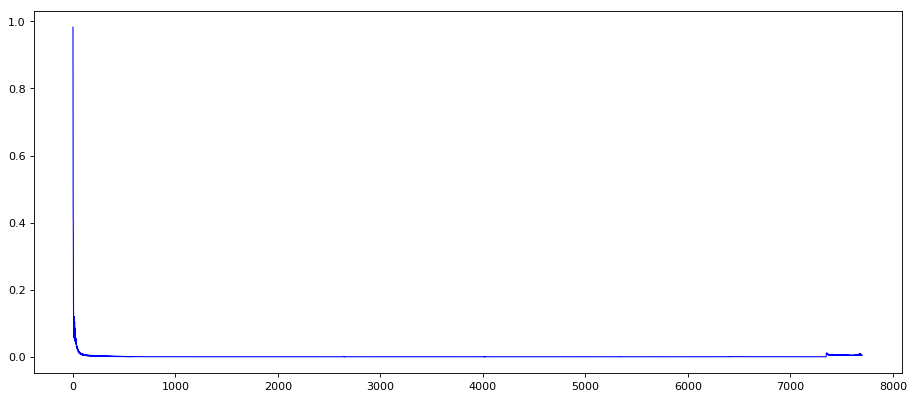

In [23]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(x_train)
ax.plot(range(0,len(losses)), losses, '-', color='blue', animated = True, linewidth=1)

### Test Datasets

In [81]:
def dynamicsComparison(actual, predicted):
    fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    size = len(actual)
    ax.plot(range(0,size), actual[:,0], '-', color='blue', animated = True, linewidth=1, label='Actual X')
    ax.plot(range(0,size), actual[:,1], '-', color='red', animated = True, linewidth=1, label='Actual Y')
    ax.plot(range(0,size), actual[:,2], '-', color='green', animated = True, linewidth=1, label='Actual Z')
    ax.plot(range(0,size), predicted[:,0], ':', color='blue', animated = True, linewidth=1, label='Predicted X')
    ax.plot(range(0,size), predicted[:,1], ':', color='red', animated = True, linewidth=1, label='Predicted Y')
    ax.plot(range(0,size), predicted[:,2], ':', color='green', animated = True, linewidth=1, label='Predictedl Z')
    ax.legend(loc='upper right', shadow=True)

In [82]:
# initial condition
def testTimeSeries(test_data):
    X_test_scaled = scaler.transform(test_data)
    x_test, y_test = getData(X_test_scaled)
    yhat_predict = mod_2.predict(x_test)
    dynamicsComparison(y_test, yhat_predict)

In [127]:
# initial condition
def testDynamics(test_data):
    X_test_scaled = scaler.transform(test_data)
    x_test_scaled, y_test_scaled = getData(X_test_scaled)
    x_test, y_test = getData(test_data)
    yhat_predict = mod_2.predict(x_test_scaled)
    yhat_rescaled = scaler.inverse_transform(yhat_predict)
    plotComparison(test_data, 'Exact Dynamics', yhat_rescaled, 'Real-valued Simple RNN')
    mse = mean_squared_error(y_test, yhat_rescaled)
    print("MSE:%.2f" % mse)

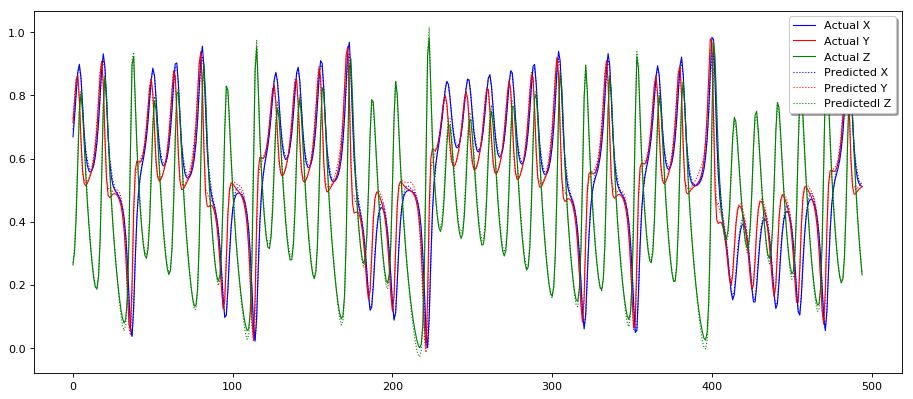

In [128]:
testTimeSeries(_data_train)

MSE:0.37


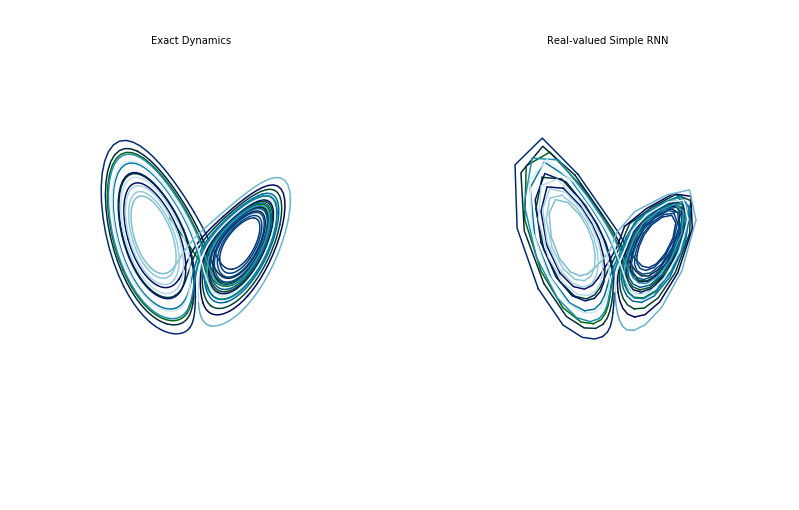

In [129]:
testDynamics(_data_train)

MSE:59.15


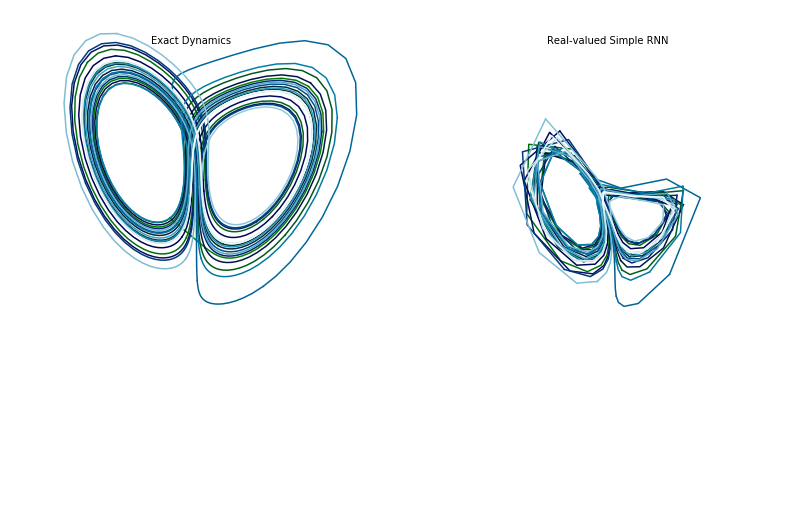

In [130]:
_data_test_one = simulate(time_points, x0, 0, 28.5, 2.2, 45)
testDynamics(_data_test_one)

MSE:13.77


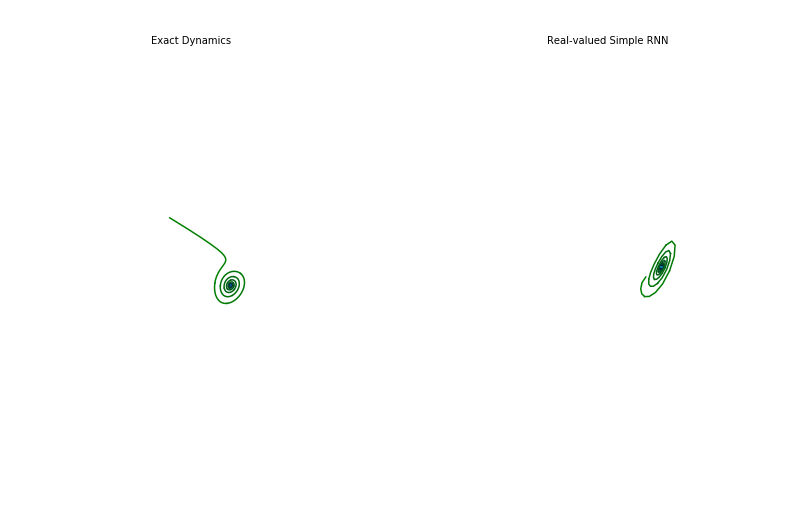

In [131]:
time_points = np.arange(0,25,0.01)
_data_test_two = simulate(time_points, x0, 0, 33.5, 2.5, 18.5)
testDynamics(_data_test_two)

MSE:23.83


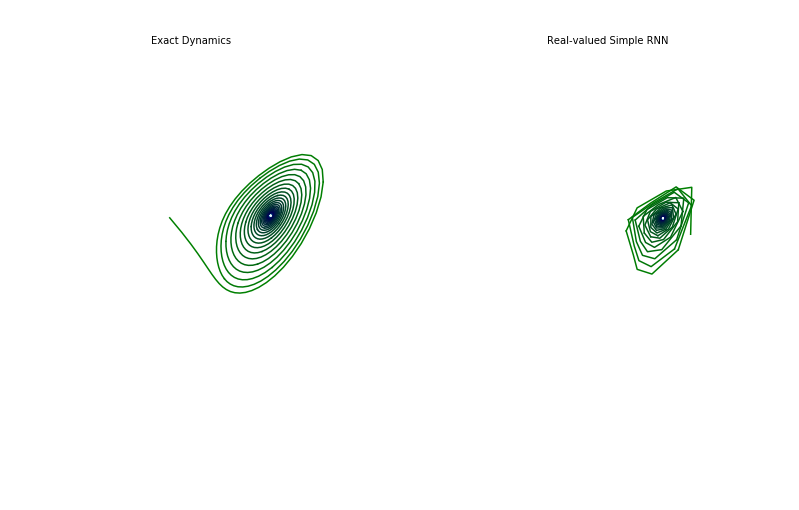

In [132]:
_data_test_three = simulate(time_points, x0, 0, 23.0, 5.9, 34.5)
testDynamics(_data_test_three )

## Complex Valued networks

### Unitary Evolution RNN

In [123]:
#from URNN import URNNCell
from complex_valued_models.SimpleURNN import SimpleURNNCell
tf.reset_default_graph()

n_steps = 20 #number of periods per vector we are using to predict one period ahead
n_inputs = 3 #number of vectors submitted
n_neurons = 50 #number of neurons we will recursively work through, can be changed to improve accuracy
n_outputs = 3 #number of output vectors

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

basic_cell = SimpleURNNCell(num_units=n_neurons, num_in=3)
rnn_outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32) #Choose dynamic over static

learning_rate = 0.01 # Small learning rate so we don't overshoot the minimum

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, 2*n_neurons]) #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) #specify the type of layers
urnn_outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #shape of results

loss = tf.reduce_mean(tf.square(urnn_outputs-y)) #define the cost function

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) #gradient descent method
training_op = optimizer.minimize(loss) #train the result of the application of the cost function

init = tf.global_variables_initializer() # initialize all the variables

In [124]:
def prepare_dataset(data_set):
    TS = np.array(data_set)
    n_steps = 20
    f_horizon = 5

    x_data = TS[:(len(TS) - (len(TS) % n_steps))]
    x_batches = x_data[0:2480,:].reshape(-1, 20, 3)

    y_data = TS[1:(len(TS) - (len(TS) % n_steps))+f_horizon]
    y_batches = y_data[0:2480,:].reshape(-1, 20, 3)
    
    return x_batches, y_batches
x_batches, y_batches = prepare_dataset(_data_train)
x_test_one, y_test_one = prepare_dataset(_data_test_one)
x_test_two, y_test_two = prepare_dataset(_data_test_two)
x_test_three, y_test_three = prepare_dataset(_data_test_three)

In [125]:
n_iterations =2500
batch_size = 50
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(iteration, "\MSE:", mse)
            
    y_pred_one = sess.run(urnn_outputs, feed_dict={X: x_test_one})
    y_pred_two = sess.run(urnn_outputs, feed_dict={X: x_test_two})
    y_pred_three = sess.run(urnn_outputs, feed_dict={X: x_test_three})

0 \MSE: 606.51355
100 \MSE: 0.79619324
200 \MSE: 0.3671449
300 \MSE: 0.28205538
400 \MSE: 0.2411875
500 \MSE: 0.21327256
600 \MSE: 0.19185443
700 \MSE: 0.17424744
800 \MSE: 0.1592188
900 \MSE: 0.14584948
1000 \MSE: 0.13395977
1100 \MSE: 0.12347868
1200 \MSE: 0.11347142
1300 \MSE: 0.10409333
1400 \MSE: 0.09530156
1500 \MSE: 0.08677416
1600 \MSE: 0.078417815
1700 \MSE: 0.070122026
1800 \MSE: 0.061935317
1900 \MSE: 0.054585956
2000 \MSE: 0.047885977
2100 \MSE: 0.042013038
2200 \MSE: 0.036823995
2300 \MSE: 0.03247274
2400 \MSE: 0.028523182


MSE:0.57


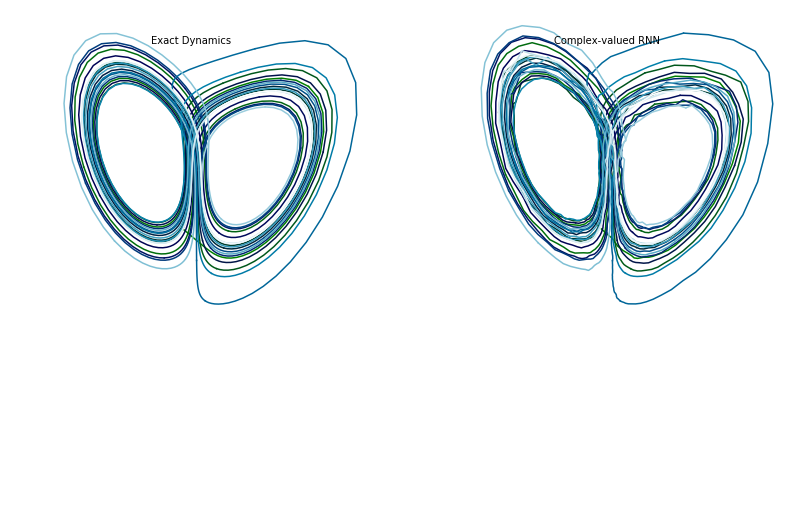

In [126]:
# initial condition
samples=2480
def test_dynamics_complex(test_data, yhat):
    yhat.shape = (samples, dim)
    test_data.shape = (samples, dim)
    plotComparison(test_data, 'Exact Dynamics', yhat, 'Complex-valued RNN')
    mse = mean_squared_error(test_data, yhat)
    print("MSE:%.2f" % mse)
    
test_dynamics_complex(y_test_one, y_pred_one)

MSE:0.09
MSE:0.66


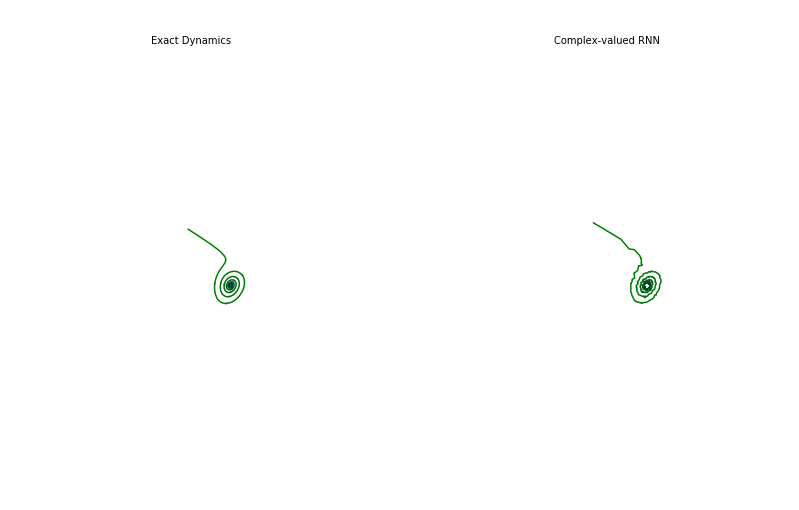

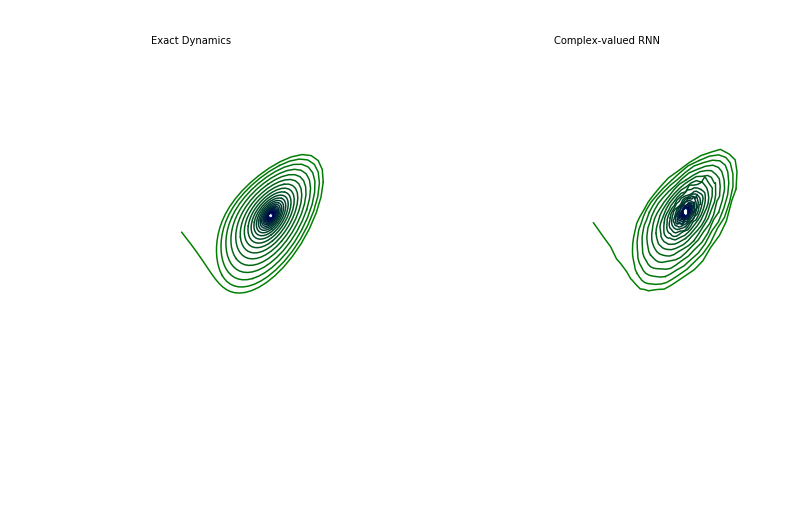

In [113]:
test_dynamics_complex(y_test_two, y_pred_two)
test_dynamics_complex(y_test_three, y_pred_three)

### Tunable Efficient Unitary RNN

In [114]:
tf.reset_default_graph()

n_steps = 20 #number of periods per vector we are using to predict one period ahead
n_inputs = 3 #number of vectors submitted
n_neurons = 50 #number of neurons we will recursively work through, can be changed to improve accuracy
n_outputs = 3 #number of output vectors

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

#basic_cell = rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
cell = ComplexRNNCell(n_neurons, 2)
hidden_out_comp, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.complex64) #Choose dynamic over static
rnn_outputs = tf.real(hidden_out_comp)


learning_rate = 3e-4 # Small learning rate so we don't overshoot the minimum

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) #change the form into a tensor
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) #specify the type of layers
eurnn_outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs]) #shape of results

loss = tf.reduce_mean(tf.square(eurnn_outputs-y)) #define the cost function

optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, decay=0.7) #gradient descent method
training_op = optimizer.minimize(loss) #train the result of the application of the cost function

init = tf.global_variables_initializer() # initialize all the variables

In [115]:
n_iterations =2500
batch_size = 50
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        sess.run(training_op, feed_dict={X: x_batches, y: y_batches})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: x_batches, y: y_batches})
            print(iteration, "\MSE:", mse)
            
    y_pred_one = sess.run(eurnn_outputs, feed_dict={X: x_test_one})
    y_pred_two = sess.run(eurnn_outputs, feed_dict={X: x_test_two})
    y_pred_three = sess.run(eurnn_outputs, feed_dict={X: x_test_three})

0 \MSE: 3018.8545
100 \MSE: 207.56105
200 \MSE: 41.094162
300 \MSE: 16.327621
400 \MSE: 7.772941
500 \MSE: 4.415964
600 \MSE: 2.7545147
700 \MSE: 1.8560315
800 \MSE: 1.3627098
900 \MSE: 1.0783999
1000 \MSE: 0.9074833
1100 \MSE: 0.79985386
1200 \MSE: 0.7279956
1300 \MSE: 0.6770688
1400 \MSE: 0.63880116
1500 \MSE: 0.6093323
1600 \MSE: 0.58607125
1700 \MSE: 0.5673542
1800 \MSE: 0.55205816
1900 \MSE: 0.5393045
2000 \MSE: 0.5284856
2100 \MSE: 0.5191075
2200 \MSE: 0.5108706
2300 \MSE: 0.5035059
2400 \MSE: 0.4968288


MSE:1.48


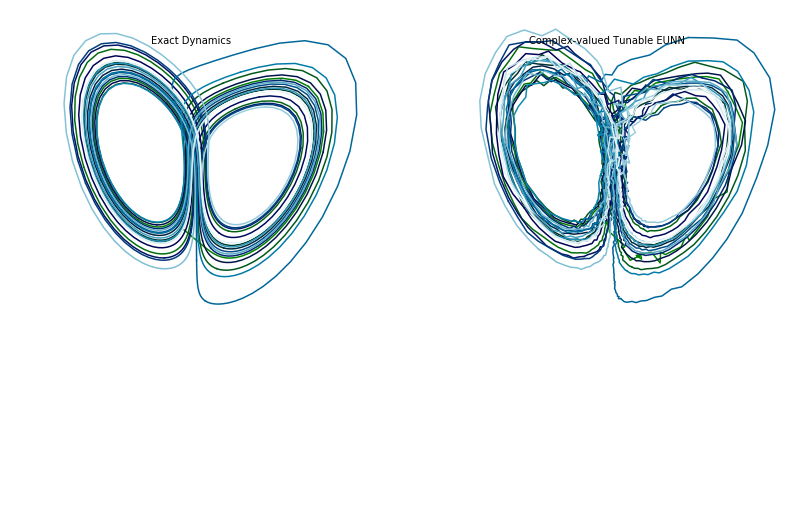

In [120]:
test_dynamics_complex(y_test_one, y_pred_one)

MSE:0.21


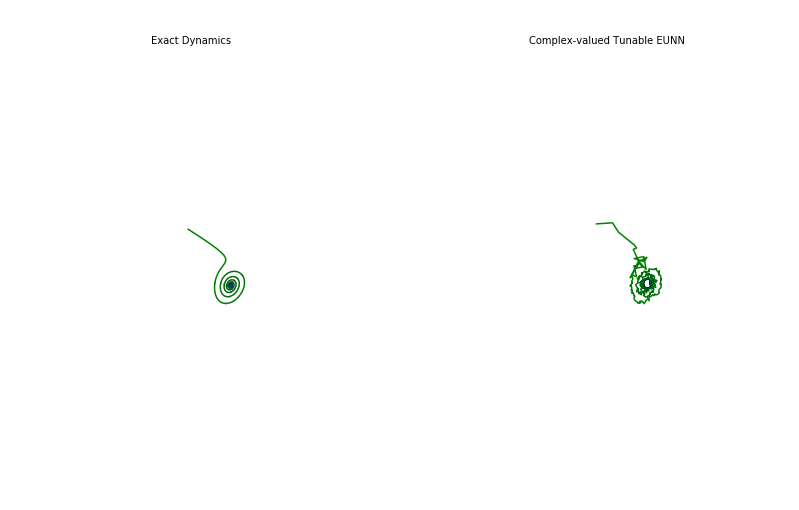

In [121]:
test_dynamics_complex(y_test_two, y_pred_two)

MSE:0.88


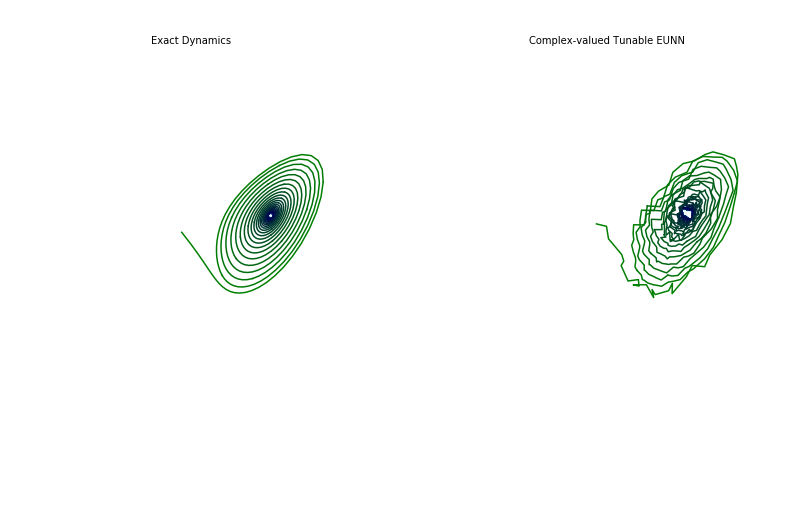

In [122]:
test_dynamics_complex(y_test_three, y_pred_three)